# Simple NN simulating sin(x)

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
plt.style.use("ggplot")

In [3]:
sample_size = 3000

In [4]:
x = np.linspace(-6, 6, sample_size, dtype='float32')

In [5]:
y = np.sin(x)
y_observed = y + np.random.normal(size=sample_size, scale=0.20)

min_y = min(y_observed)
max_y = max(y_observed)

y_observed = (y_observed - min_y) / (max_y - min_y)
y = (y - min_y) / (max_y - min_y)

y_observed = y # delete afterwards

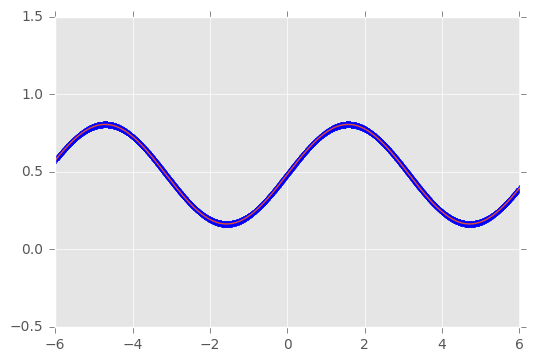

In [6]:
fig = plt.figure()
fig.add_subplot()
ax = fig.gca()
ax.plot(x, y)
ax.set_ylim(-0.5, 1.5)
ax.set_xlim(-6.01, 6.01)
ax.scatter(x, y_observed, marker='+')

In [7]:
neurons_number = {"layer_1": 20,
                  "layer_2": 20, 
                  "layer_3": 50}

give_x = tf.placeholder('float32')
give_y = tf.placeholder('float32')

activation_f = tf.nn.tanh

hl_1 = {"weights": tf.Variable(tf.random_normal([1, neurons_number['layer_1']])),
        "biases": tf.Variable(tf.constant(0, shape=[neurons_number['layer_1']], dtype='float'))}

hl_2 = {"weights": tf.Variable(tf.random_normal([neurons_number['layer_1'], neurons_number['layer_2']])),
        "biases": tf.Variable(tf.constant(0, shape=[neurons_number['layer_2']], dtype='float'))}

hl_3 = {"weights": tf.Variable(tf.random_normal([neurons_number['layer_2'], neurons_number['layer_3']])),
        "biases": tf.Variable(tf.constant(0, shape=[neurons_number['layer_3']], dtype='float'))}

output_layer = {"weights": tf.Variable(tf.random_normal([neurons_number['layer_3'], 1])),
                "biases": tf.Variable(tf.constant(0, shape=[1], dtype='float'))}

l1 = tf.add(tf.matmul(give_x, hl_1['weights']), hl_1['biases'])
l1 = activation_f(l1)

l2 = tf.add(tf.matmul(l1, hl_2['weights']), hl_2['biases'])
l2 = activation_f(l2)

l3 = tf.add(tf.matmul(l2, hl_3['weights']), hl_3['biases'])
l3 = activation_f(l3)

output = tf.add(tf.matmul(l3, output_layer['weights']), output_layer['biases'])


x_feed_nn = x.reshape(sample_size, 1)
y_feed_nn = y_observed.reshape(sample_size,1)
output

<tf.Tensor 'Add_3:0' shape=(?, 1) dtype=float32>

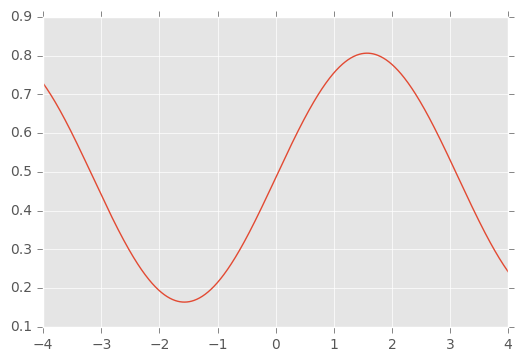

In [8]:
prediction = output
cost = tf.reduce_mean(abs(prediction - give_y)**2)

optimizer = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(cost)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost) 

n_epochs = 2000

x_sin = np.linspace(-4, 4, 1000)
plt.plot(x_sin, (np.sin(x_sin) - min_y) / (max_y - min_y))
model_sample_size = 50
model_x = np.linspace(-3, 3, model_sample_size, dtype='float32')
model_x = np.random.uniform(-3, 3, size=model_sample_size)


In [11]:
graph = tf.get_default_graph()


In [19]:
"{1:10}{0}".format(1, 2)

'         21'

In [21]:
for index, op in enumerate(graph.get_operations()):
    print("{0:15} - {1}".format(index, op.name))
    

              0 - Placeholder
              1 - Placeholder_1
              2 - random_normal/shape
              3 - random_normal/mean
              4 - random_normal/stddev
              5 - random_normal/RandomStandardNormal
              6 - random_normal/mul
              7 - random_normal
              8 - Variable
              9 - Variable/Assign
             10 - Variable/read
             11 - Const
             12 - Variable_1
             13 - Variable_1/Assign
             14 - Variable_1/read
             15 - random_normal_1/shape
             16 - random_normal_1/mean
             17 - random_normal_1/stddev
             18 - random_normal_1/RandomStandardNormal
             19 - random_normal_1/mul
             20 - random_normal_1
             21 - Variable_2
             22 - Variable_2/Assign
             23 - Variable_2/read
             24 - Const_1
             25 - Variable_3
             26 - Variable_3/Assign
             27 - Variable_3/read
             28 

#### Graph execution

start
 Epoch  400  completed out of  2000  loss:  0.0220701
 Epoch  800  completed out of  2000  loss:  0.012196
 Epoch  1200  completed out of  2000  loss:  0.00647448
 Epoch  1600  completed out of  2000  loss:  0.00348683
 Epoch  2000  completed out of  2000  loss:  0.0020737


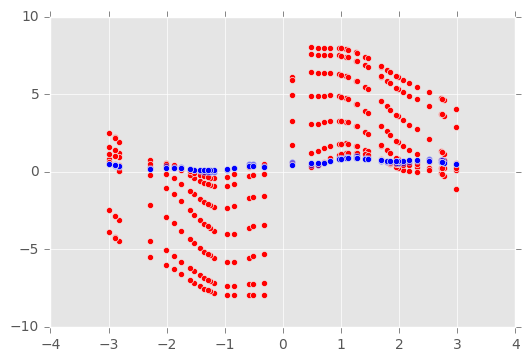

In [9]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("start")
    for epoch in range(1, n_epochs + 1):
        _, epoch_loss = sess.run([optimizer, cost], feed_dict={give_x: x_feed_nn, give_y: y_feed_nn})
        if epoch % 400 == 0:
            print(" Epoch ", epoch, ' completed out of ', n_epochs, ' loss: ', epoch_loss)
        
        if epoch in [1, 5, 15, 30, 60, 120, 240]:
            m_y = tf.reduce_mean(output, axis=1).eval(feed_dict={give_x: model_x.reshape((model_sample_size, 1))}, session=sess)
            plt.scatter(model_x, m_y, c="red")
        
        if epoch % 1000 == 0:       
#             model_y = output.eval(feed_dict={give_x: model_x.reshape((model_sample_size, 1))}, session=sess)
            m_y = tf.reduce_mean(output, axis=1).eval(feed_dict={give_x: model_x.reshape((model_sample_size, 1))}, session=sess)
            plt.scatter(model_x, m_y, alpha=epoch/n_epochs)

# ax.set_ylim(-1.5, 1.5)
# ax.set_xlim(-6.01, 6.01)
# ax.scatter(x, y_observed, marker='+')


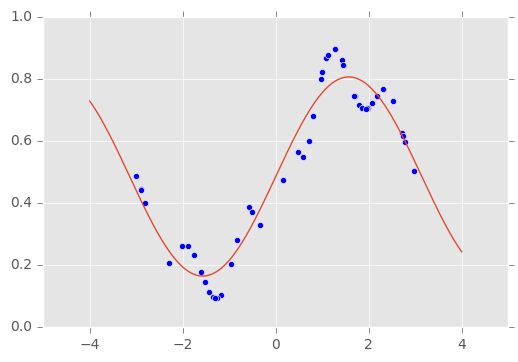

In [10]:
x_sin = np.linspace(-4, 4, 1000)
plt.plot(x_sin, (np.sin(x_sin) - min_y) / (max_y - min_y))
plt.scatter(model_x, m_y)

In [10]:
model_x.shape

(50,)

In [11]:
m_y.shape

(50,)

In [12]:
output

<tf.Tensor 'Add_3:0' shape=(?, 1) dtype=float32>